# Google Connect

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd drive/MyDrive/232E-SocialNetworks/Project4/

/content/drive/MyDrive/232E-SocialNetworks/Project4


#Imports

In [ ]:
!pip install igraph
!pip install cairocffi

In [ ]:
!apt-get install libcairo2-dev libjpeg-dev libgif-dev
!pip install pycairo

In [5]:
import numpy as np
import pandas as pd
import igraph as ig
import json
import csv
import matplotlib.pyplot as plt 
import cairocffi
import cairo
import networkx as nx

# Build Your Graph

## Question 9

In [ ]:
file_path = 'los_angeles-censustracts-2019-4-All-MonthlyAggregate.csv'
uber_mov = pd.read_csv(file_path, usecols=['sourceid', 'dstid', 'mean_travel_time', 'month'])
uber_mov = uber_mov[uber_mov['month']==12][['sourceid','dstid','mean_travel_time']]
gd = uber_mov.values
graph_dict = {}
for sourceid,dstid,mean_travel_time in gd:
    key = tuple(np.sort([int(sourceid), int(dstid)]))
    if key in graph_dict: graph_dict[key].append(mean_travel_time)
    else: graph_dict[key] = [mean_travel_time]

In [ ]:
with open('graph.txt','w') as f:
    for loc in graph_dict:
        f.write('{} {} {}\n'.format(loc[0], loc[1], np.mean(graph_dict[loc])))

In [ ]:
g = ig.Graph.Read(f = 'graph.txt', format = 'ncol', directed = False)
gcc = g.components().giant()
print("Nodes: ",len(gcc.vs))
print("Edges: ", len(gcc.es))

Nodes:  2649
Edges:  1004955


# Traveling Salesman Problem

## Question 10

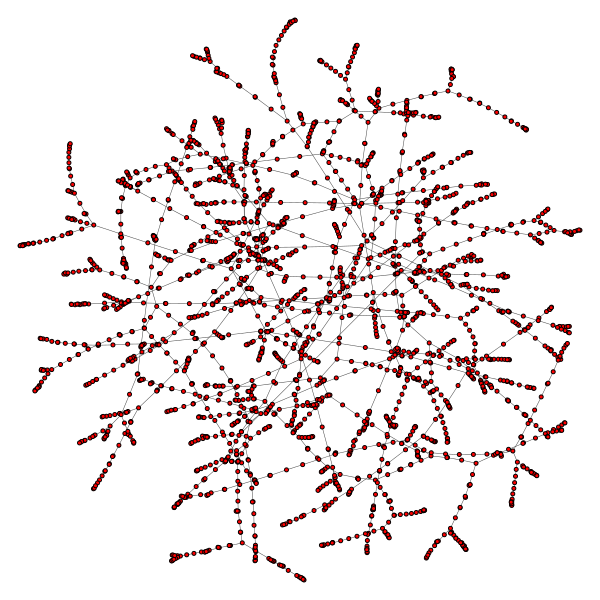

In [ ]:
mst = gcc.spanning_tree(weights = gcc.es["weight"])
visual_style = {
    "edge_width": 0.5,
    "vertex_size": 4
}
ig.plot(mst,**visual_style, target='graphs/q10.png')

In [ ]:
loc = {}
file_path = 'los_angeles_censustracts.json'
with open(file_path, 'r') as f:
    curr = json.loads(f.readline())
    for feature in curr['features']:
        coord = np.array(feature['geometry']['coordinates'][0][0])
        mean_coord = np.mean(coord.reshape(-1,2), axis=0)
        loc[feature['properties']['MOVEMENT_ID']] = {'address': feature['properties']['DISPLAY_NAME'],'mean_coords': mean_coord}

In [ ]:
print(loc)

{'1': {'address': 'Census Tract 480302', 'mean_coords': array([-118.11683 ,   34.107225])}, '2': {'address': 'Census Tract 480303', 'mean_coords': array([-118.134669,   34.098771])}, '3': {'address': 'Census Tract 480304', 'mean_coords': array([-118.134532,   34.091566])}, '4': {'address': 'Census Tract 480400', 'mean_coords': array([-118.12276,   34.10447])}, '5': {'address': 'Census Tract 480500', 'mean_coords': array([-118.141784,   34.098765])}, '6': {'address': 'Census Tract 480704', 'mean_coords': array([-118.152124,   34.098665])}, '7': {'address': 'Census Tract 480802', 'mean_coords': array([-118.146397,   34.087877])}, '8': {'address': 'Census Tract 480803', 'mean_coords': array([-118.154182,   34.095204])}, '9': {'address': 'Census Tract 480804', 'mean_coords': array([-118.155292,   34.098576])}, '10': {'address': 'Census Tract 480901', 'mean_coords': array([-118.144793,   34.080843])}, '11': {'address': 'Census Tract 480902', 'mean_coords': array([-118.134507,   34.081071])}

In [ ]:
edges = mst.es()
for e in edges[:20]:
    x, y = mst.vs(e.tuple[0])[0]['name'], mst.vs(e.tuple[1])[0]['name']
    print("Endpoint 1:", loc[str(x)]['address'],loc[str(x)]['mean_coords'], 
          "Endpoint 2:", loc[str(y)]['address'],loc[str(y)]['mean_coords'])

Endpoint 1: Census Tract 554001 [-118.133298   33.904119] Endpoint 2: Census Tract 554002 [-118.141448   33.896526]
Endpoint 1: Census Tract 461700 [-118.159325   34.153604] Endpoint 2: Census Tract 460800 [-118.172425   34.180286]
Endpoint 1: Census Tract 302201 [-118.251349   34.146334] Endpoint 2: Census Tract 302202 [-118.248811   34.142665]
Endpoint 1: Census Tract 407101 [-117.967696   34.04101 ] Endpoint 2: Census Tract 407002 [-117.980572   34.051745]
Endpoint 1: Census Tract 433401 [-118.043316   34.058606] Endpoint 2: Census Tract 433402 [-118.038157   34.056957]
Endpoint 1: Census Tract 543603 [-118.28871    33.803659] Endpoint 2: Census Tract 294410 [-118.289861   33.797764]
Endpoint 1: Census Tract 482001 [-118.165951   34.062293] Endpoint 2: Census Tract 530700 [-118.176633   34.062274]
Endpoint 1: Census Tract 460800 [-118.172425   34.180286] Endpoint 2: Census Tract 463800 [-118.167761   34.141469]
Endpoint 1: Census Tract 269100 [-118.398461   34.057095] Endpoint 2: Ce

## Question 11

In [ ]:
def retrieve_edge(v):
    edge1 = gcc.get_eid(v[0],v[1])
    edge2 = gcc.get_eid(v[1],v[2])
    edge3 = gcc.get_eid(v[2],v[0])
    weights = [gcc.es['weight'][edge1], gcc.es['weight'][edge2], gcc.es['weight'][edge3]]
    return weights

In [ ]:
triangles = []
size = 1000
while len(triangles) <= size:
    v = np.random.randint(1, high=len(gcc.vs), size=3)
    try:
        triangles.append(retrieve_edge(v))
    except: 
        continue

In [ ]:
def is_triangle(weight1, weight2, weight3):
    return weight1+weight2>weight3 and weight1+weight3>weight2 and weight3+weight2>weight1

In [ ]:
cnt = 0
for triangle in triangles:
    if is_triangle(triangle[0], triangle[1], triangle[2]): 
        cnt += 1
triangle_cnt = cnt / len(triangles)
print(triangle_cnt)

0.9090909090909091


## Question 12

In [ ]:
def swap(x1, x2):
    if x1 > x2:
        x1, x2 = x2, x1
    return x1, x2

In [ ]:
gf = uber_mov.values
for i in range(0,len(gf)):
    gf[i][0], gf[i][1] = swap(gf[i][0], gf[i][1])
gf = (pd.DataFrame(gf).groupby([0,1]).mean().reset_index()).rename(columns={0: "source", 1: "sink", 2: "weight"})
g = nx.from_pandas_edgelist(gf, 'source','sink', ['weight'])

In [ ]:
def find_cost(mst, gcc, tours):
    path = []
    visited = set()
    for tour in tours:
        if tour not in visited: 
            path.append(tour) 
            visited.add(tour) 
    path.append(path[0])
    cost = 0
    for i in range(len(path) - 1):
        s,t = path[i], path[i+1]
        weight = 0
        if mst.has_edge(s,t): 
            weight = mst.edges[s,t]['weight']
        else: 
            weight = nx.dijkstra_path_length(gcc,s,t)
        cost += weight
    return path, cost

In [ ]:
def find_upperBound(g):
    gcc = g.subgraph(max(nx.connected_components(g), key=len))
    mst = nx.minimum_spanning_tree(gcc)
    mg = nx.MultiGraph()
    edges = mst.edges
    nodes = mg.nodes
    vertices = []
    costs = []
    paths = []
    optimal_tsp_cost = 0
    cnt = 0

    for edge in edges:
        weight = edges[edge[0],edge[1]]['weight']
        optimal_tsp_cost += weight
        mg.add_edge(edge[0],edge[1],weight=weight)
        mg.add_edge(edge[0],edge[1],weight=weight)

    for node in nodes:
        vertices.append(node)
        cnt += 1
        if cnt > 60: 
            break

    for vertex in vertices:
        tours = [u for u, _ in nx.eulerian_circuit(mg, source=vertex)]
        curr_path, curr_cost = find_cost(mst, gcc, tours)
        costs.append(curr_cost)
        paths.append(curr_path)

    approx_tsp_cost = min(costs)
    trajectory = paths[np.argmin(costs)]
    return optimal_tsp_cost, approx_tsp_cost, trajectory

In [ ]:
optimal_tsp_cost, approx_tsp_cost, trajectory = find_upperBound(g)

In [ ]:
print('Optimal TSP Cost:', optimal_tsp_cost)
print('Approximate TSP Cost:', approx_tsp_cost)
print('Upper bound:',approx_tsp_cost/optimal_tsp_cost)

Optimal TSP Cost: 269084.54500000016
Approximate TSP Cost: 421490.07499999984
Upper bound: 1.5663852972306513


In [ ]:
print(trajectory)

[1.0, 3.0, 13.0, 2.0, 4.0, 5.0, 9.0, 8.0, 7.0, 6.0, 2015.0, 2014.0, 2013.0, 2010.0, 1060.0, 1186.0, 1059.0, 1062.0, 1177.0, 1063.0, 1178.0, 1172.0, 1687.0, 1218.0, 1227.0, 1171.0, 1170.0, 1230.0, 1223.0, 1229.0, 1228.0, 1224.0, 1235.0, 1254.0, 1255.0, 1258.0, 1257.0, 1256.0, 1288.0, 1287.0, 1289.0, 1292.0, 1291.0, 1294.0, 1295.0, 1296.0, 1293.0, 1290.0, 1286.0, 1308.0, 1307.0, 1306.0, 1304.0, 1305.0, 1362.0, 1363.0, 1336.0, 1361.0, 1359.0, 1360.0, 1309.0, 1248.0, 1251.0, 1249.0, 1250.0, 1253.0, 1252.0, 1236.0, 1238.0, 1241.0, 1240.0, 1237.0, 1246.0, 1247.0, 1245.0, 1244.0, 1265.0, 1242.0, 1266.0, 1267.0, 1243.0, 1263.0, 1382.0, 1385.0, 1386.0, 1381.0, 1388.0, 1379.0, 1414.0, 1422.0, 1426.0, 1425.0, 1424.0, 1433.0, 1472.0, 1474.0, 1475.0, 1476.0, 1477.0, 2366.0, 1478.0, 1483.0, 1484.0, 1485.0, 1486.0, 1493.0, 1492.0, 2370.0, 1507.0, 1506.0, 1505.0, 1510.0, 2372.0, 2369.0, 2368.0, 2367.0, 1473.0, 1479.0, 1480.0, 1481.0, 1482.0, 1487.0, 1423.0, 1402.0, 1403.0, 1411.0, 1412.0, 1404.0, 1410

## Question 13

In [6]:
map_bound = ((-118.75, -117.75, 33.45, 34.45))
figsize = (14.56,17.60)
def mapping(lon, lat, z=None, fig_size = figsize, boundary=map_bound, real_map='LA.png',title='Title', save=False,name=None, plot_point=None):
    fig, ax = plt.subplots(figsize = fig_size)
    if z:
        plt.triplot(lon, lat, z)
    else:
        ax.plot(lons,lats,color='purple',markersize=2,marker='*',markerfacecolor='blue')
    if plot_point:
        plt.plot(plot_point[0],plot_point[1],'k.',ms=20)
    ax.set_title(title)
    plt.xlabel('Longitude')
    plt.ylabel('Lattitude')
    ax.set_xlim(boundary[0],boundary[1])
    ax.set_ylim(boundary[2],boundary[3])
    if real_map != '':
        ax.imshow(plt.imread(real_map), zorder=0, extent = boundary, aspect= 'equal')
    if save:
        plt.savefig('{}.png'.format(name))
    plt.show()

In [7]:
def pinpoint(loc):
    if len(loc)==1:
        p = np.asarray(loc[0]).mean(axis=0)
    elif len(loc)==2:
        p = np.asarray(loc[0]+loc[1]).mean(axis=0)
    else: 
        p = np.asarray(loc).mean(axis=0)

In [10]:
data = json.load(open('los_angeles_censustracts.json'))
locations = []
lons = []
lats = []
for loc1 in trajectory:
    for loc2 in range(len(data['features'])):
        if data['features'][loc2]['properties']['MOVEMENT_ID']==str(int(loc1)):
            curr = data['features'][loc2]['geometry']['coordinates'][0]
            if len(curr)==1:
                lon, lat = np.asarray(curr[0]).mean(axis=0)
            elif len(curr)==2:
                lon, lat = np.asarray(curr[0]+curr[1]).mean(axis=0)
            elif loc1 ==1932.0:
                lon, lat = np.asarray(curr[0]+curr[1]+curr[2]+curr[3]+curr[4]+curr[5]).mean(axis=0)
            else: 
                lon, lat = np.asarray(curr).mean(axis=0)
            lons.append(lon)
            lats.append(lat)

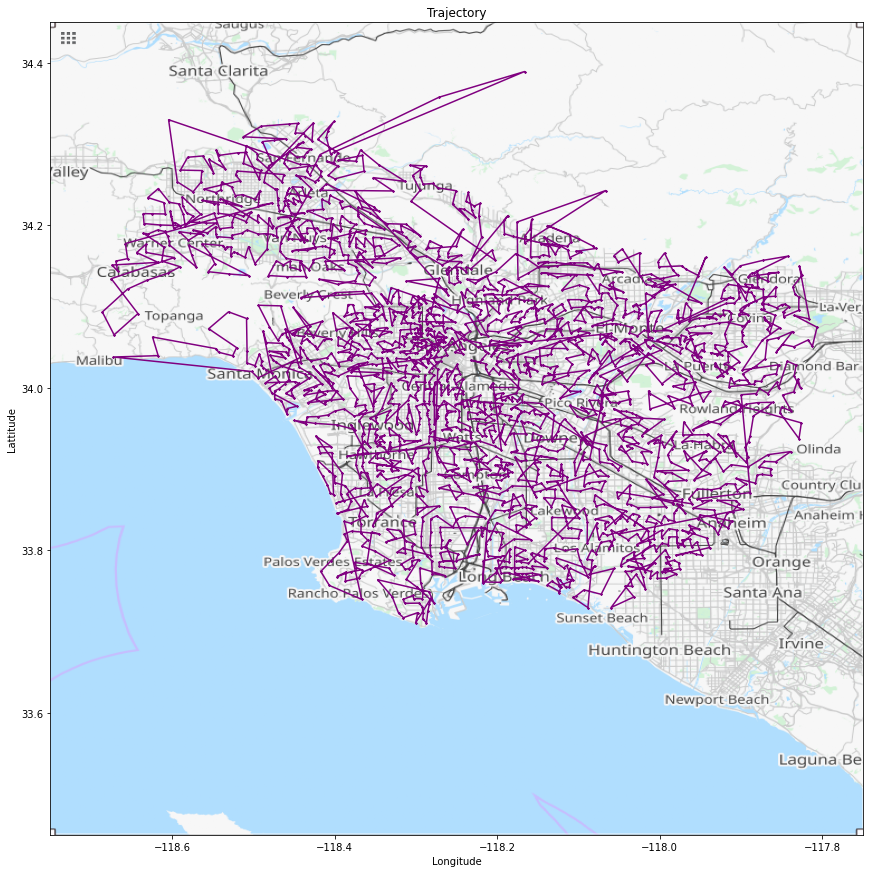

In [11]:
mapping(lons, lats, title='Trajectory')

# Estimate the Roads

## Question 14 & 17

In [12]:
from scipy.spatial import Delaunay
def mean_list(lst):
    return sum(lst) / len(lst)

In [13]:
pin = {}
json_data = []
with open('los_angeles_censustracts.json') as f:
    for line in f:
        json_data.append(json.loads(line))
f.close()

In [14]:
for entry in json_data:
    features = entry['features']
    for feature in features:
        latitude = []
        longitude = []
        feature_type = feature['geometry']['type']
        coords = np.array(feature['geometry']['coordinates'][0]) if feature_type == 'Polygon' else np.array(feature['geometry']['coordinates'][0][0])
        n = len(coords)
        for coord in coords:
            longitude.append(coord[0])
            latitude.append(coord[1])
        lat = mean_list(latitude)
        lon = mean_list(longitude)
        pin[feature['properties']['MOVEMENT_ID']] = (feature['properties']['DISPLAY_NAME'], lat, lon)

In [15]:
gcc = np.loadtxt('graph.txt')
gcc_graph = {}
for row in gcc:
    location_index = tuple(np.sort(row[0:2]).astype('int'))
    gcc_graph[location_index] = row[2]
gcc_ids = np.concatenate([gcc[:,0],gcc[:,1]])
gcc_ids = np.unique(gcc_ids).astype('int')
lat2 = []
lon2 = []
for n,location_key in enumerate(gcc_ids):
    lon2.append(pin[str(location_key)][1])
    lat2.append(pin[str(location_key)][2])

In [119]:
print(lon2)

[34.103095573770496, 34.09645121052631, 34.09626386363636, 34.10349303174603, 34.098681500000005, 34.098628, 34.083419626666675, 34.09029572857144, 34.09595766071429, 34.085386535714285, 34.08013327272727, 34.07262508695652, 34.08759475, 34.09585388135593, 34.08121859210527, 34.08627507692308, 34.08456533333333, 34.07206640540541, 34.076590869565216, 34.063710942857135, 34.06994802040815, 34.064586108910895, 34.1664155909091, 34.15513302439025, 34.1426536631579, 34.142880988888884, 34.13033511764706, 34.12621527777778, 34.13765352631579, 34.12761491489363, 34.11636753571428, 34.12508531578948, 34.10409581355931, 34.109322295081974, 34.118312249999995, 34.12243708333333, 34.11131672413794, 34.09543192307692, 33.87690251515153, 33.868356372093025, 33.86132791666665, 34.13965797849462, 34.14873872368422, 34.15035921019108, 34.13688211702129, 34.11772844186047, 34.10799621739131, 34.12746769444445, 34.127015051282065, 34.12744793103448, 34.11780265714285, 34.12748959302325, 34.121172095238

In [103]:
pin2 = tuple(zip(lat2, lon2))
tri = Delaunay(pin2)

In [104]:
tri_list = []
for s in tri.simplices.copy():
    tri_list.append(s)

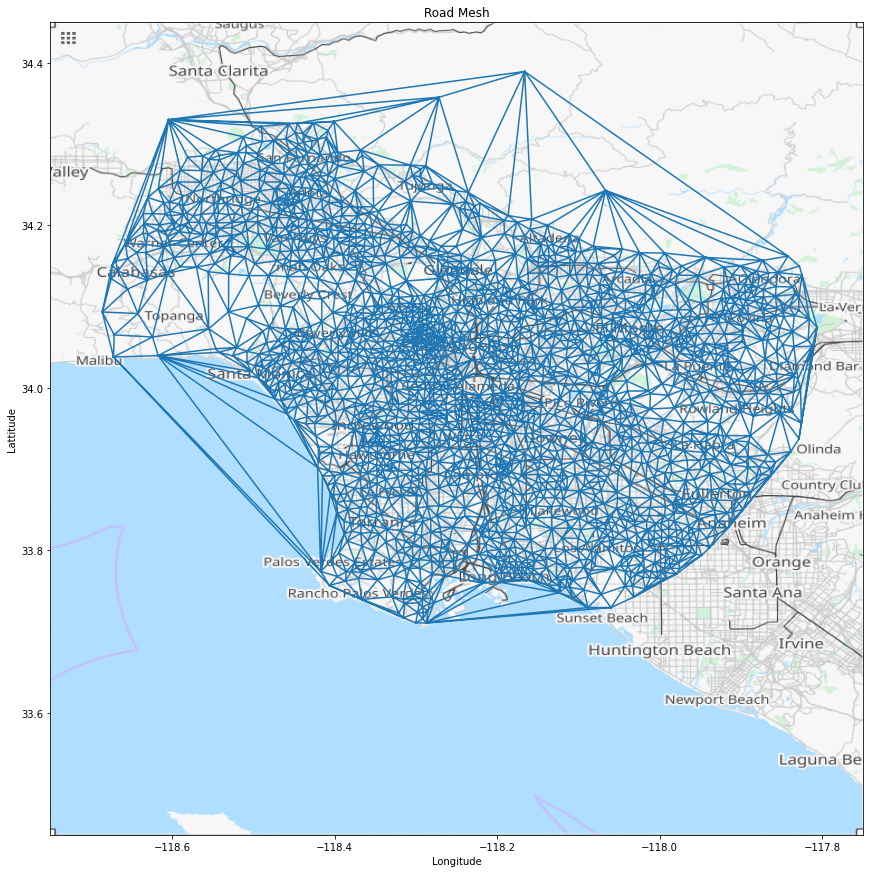

In [105]:
mapping(lat2, lon2, z=tri_list, title='Road Mesh')

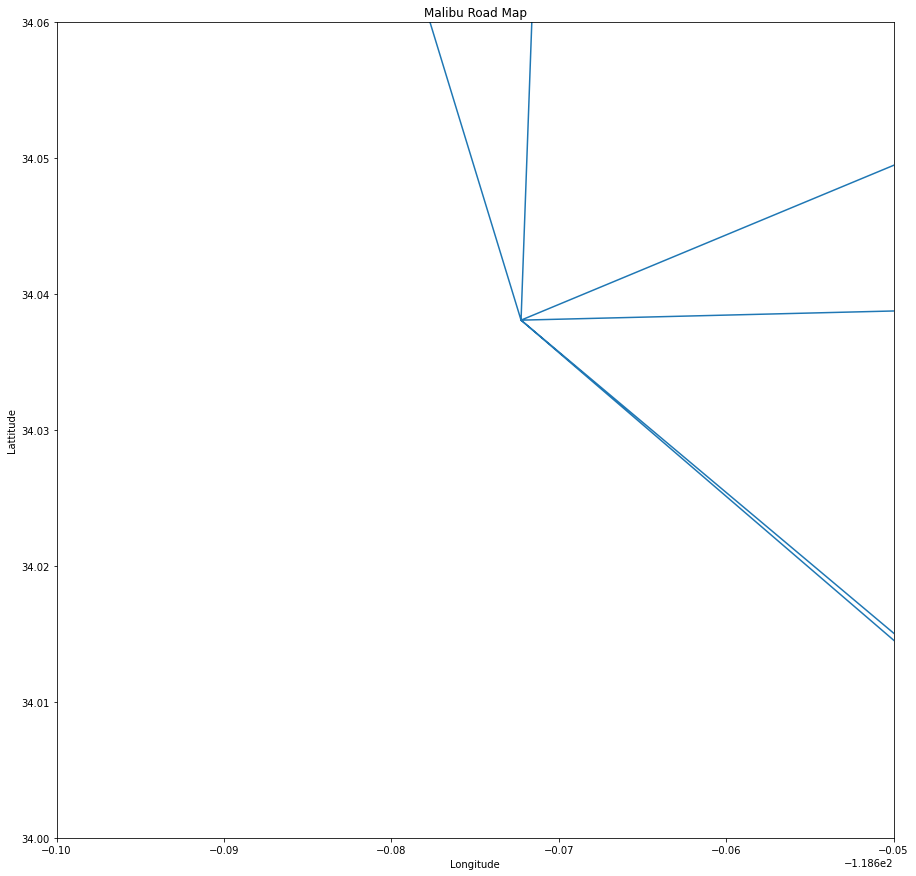

In [24]:
malibu_bound = ((-118.70, -118.65, 34.00, 34.06))
fig, ax = plt.subplots(figsize = (15,15))
plt.triplot(lat2, lon2, tri_list)
ax.set_title('Malibu Road Map')
plt.xlabel('Longitude')
plt.ylabel('Lattitude')
ax.set_xlim(malibu_bound[0],malibu_bound[1])
ax.set_ylim(malibu_bound[2],malibu_bound[3])
plt.show()

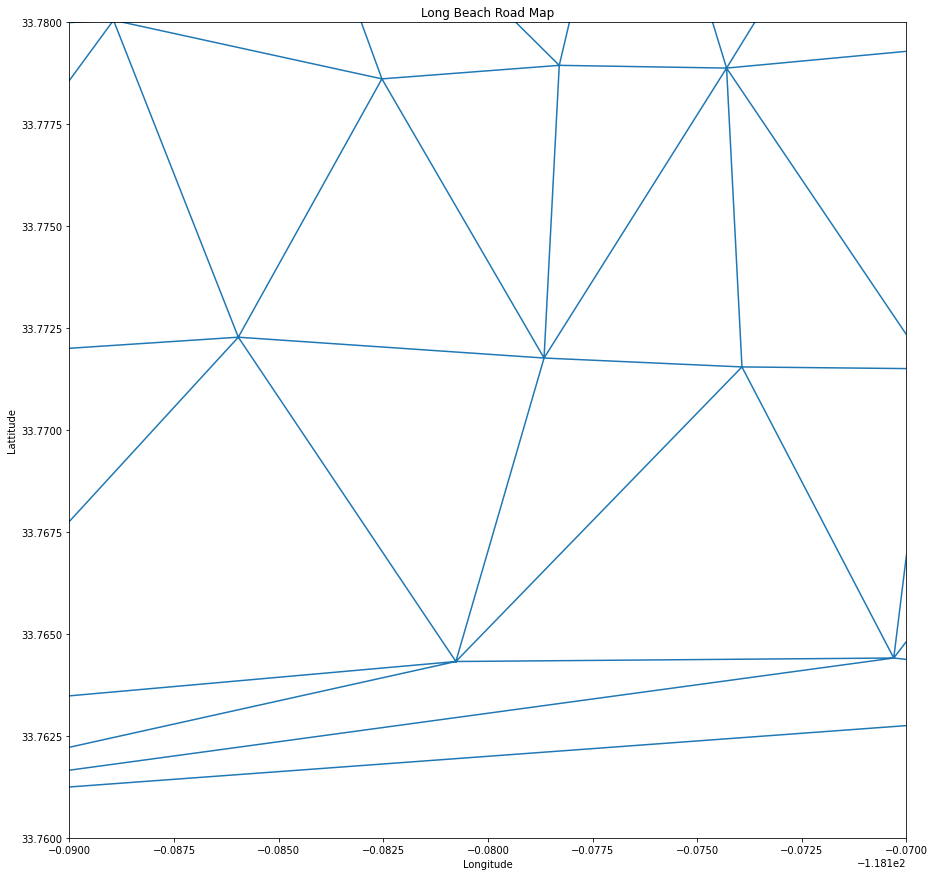

In [26]:
lb_bound = ((-118.19, -118.17, 33.76, 33.78))
fig, ax = plt.subplots(figsize = (15,15))
plt.triplot(lat2, lon2, tri_list)
ax.set_title('Long Beach Road Map')
plt.xlabel('Longitude')
plt.ylabel('Lattitude')
ax.set_xlim(lb_bound[0],lb_bound[1])
ax.set_ylim(lb_bound[2],lb_bound[3])
plt.show()

In [27]:
def get_time(loc1,loc2,gcc_graph):
    if (loc1,loc2) in gcc_graph.keys():
        return gcc_graph[(loc1,loc2)]
    else:
        return 0

def add_travel_time_edge(graph,triangle,threshold):
    edge12 = tuple(np.sort(triangle[:2]))
    edge13 = tuple(np.sort(triangle[0::2]))
    edge23 = tuple(np.sort(triangle[1:]))   
    
    time12 = get_time(edge12[0],edge12[1],gcc_graph)
    time13 = get_time(edge13[0],edge13[1],gcc_graph)
    time23 = get_time(edge23[0],edge23[1],gcc_graph)
    
    if edge12 not in graph.keys() and time12 < threshold and time12 > 0:
        graph[edge12] = time12
    if edge13 not in graph.keys() and time13 < threshold and time13 > 0:
        graph[edge13] = time13
    if edge23 not in graph.keys() and time23 < threshold and time23 > 0:
        graph[edge23] = time23

In [28]:
time_prune = {}
THRESH = 60*11 #11 minutes in seconds

for triangle_idx in tri.simplices:
    triangle = [gcc_ids[triangle_idx[0]], gcc_ids[triangle_idx[1]], gcc_ids[triangle_idx[2]]]
    add_travel_time_edge(time_prune, triangle, THRESH)
    
print(len(time_prune))

7729


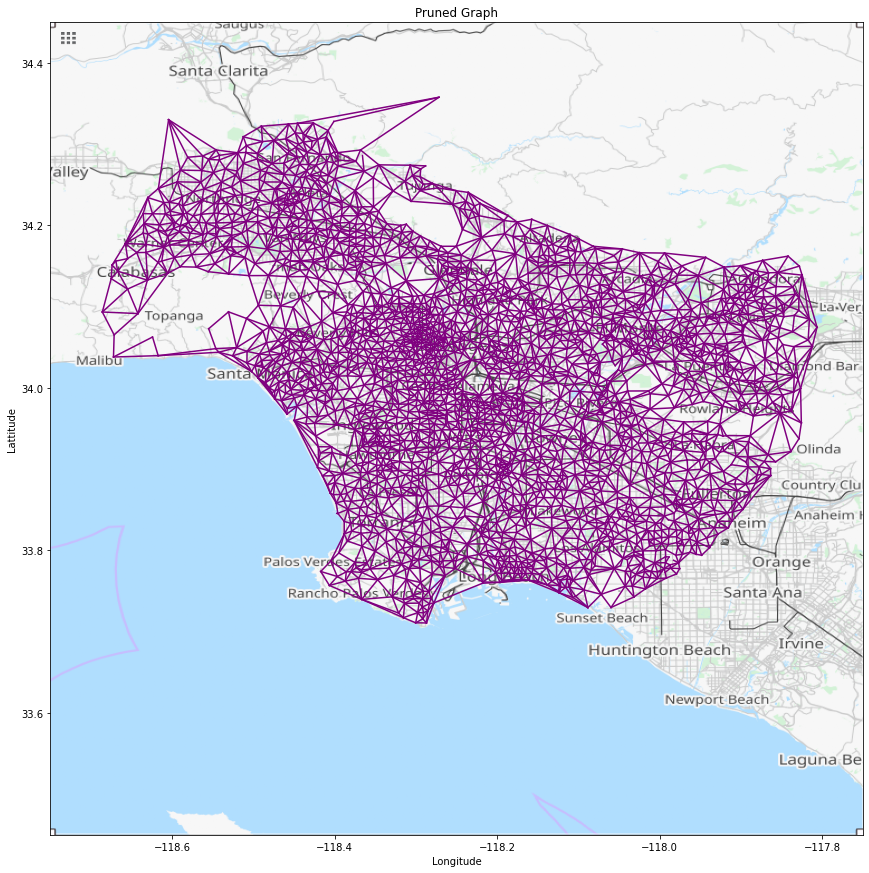

In [29]:
boundary = ((-118.75, -117.75, 33.45, 34.45))
fig, ax = plt.subplots(figsize = (14.56,17.60))
for edges in time_prune.keys():
    coords1 = [pin[str(edges[0])][1], pin[str(edges[0])][2]]
    coords2 = [pin[str(edges[1])][1], pin[str(edges[1])][2]]
    ax.plot([coords1[1],coords2[1]], [coords1[0],coords2[0]],color='purple')
ax.set_title('Pruned Graph')
plt.xlabel('Longitude')
plt.ylabel('Lattitude')
ax.set_xlim(boundary[0],boundary[1])
ax.set_ylim(boundary[2],boundary[3])
ax.imshow(plt.imread('LA.png'), zorder=0, extent = boundary, aspect= 'equal')
plt.show()

In [122]:
print(time_prune)

{(1711, 2469): 532.315, (2466, 2469): 268.625, (2465, 2469): 437.335, (2465, 2466): 254.44, (147, 2465): 292.605, (146, 147): 224.735, (146, 2465): 563.485, (147, 2466): 238.75, (147, 148): 162.665, (148, 2466): 285.69, (733, 2474): 306.17, (1712, 2470): 205.555, (1711, 2470): 550.17, (1711, 1712): 356.51, (995, 1694): 615.265, (386, 2165): 103.195, (995, 2468): 592.3199999999999, (148, 2468): 428.765, (2464, 2465): 351.88, (146, 2464): 232.965, (1525, 1955): 223.985, (1955, 1956): 131.49, (1525, 1956): 292.1, (1523, 1712): 324.105, (1522, 1523): 291.05, (1000, 1017): 186.07, (1522, 1690): 136.32, (1015, 1017): 321.70000000000005, (1672, 1674): 132.665, (1673, 1674): 89.215, (1672, 1673): 230.505, (1669, 1674): 193.71499999999997, (1669, 1672): 123.69, (2627, 2690): 139.11, (2626, 2627): 67.255, (2626, 2690): 138.88, (1954, 1955): 117.195, (1954, 1956): 147.125, (1952, 1955): 178.82, (1952, 1954): 235.185, (1953, 1954): 143.895, (1952, 1953): 102.39, (707, 1696): 159.77, (2147, 2474): 

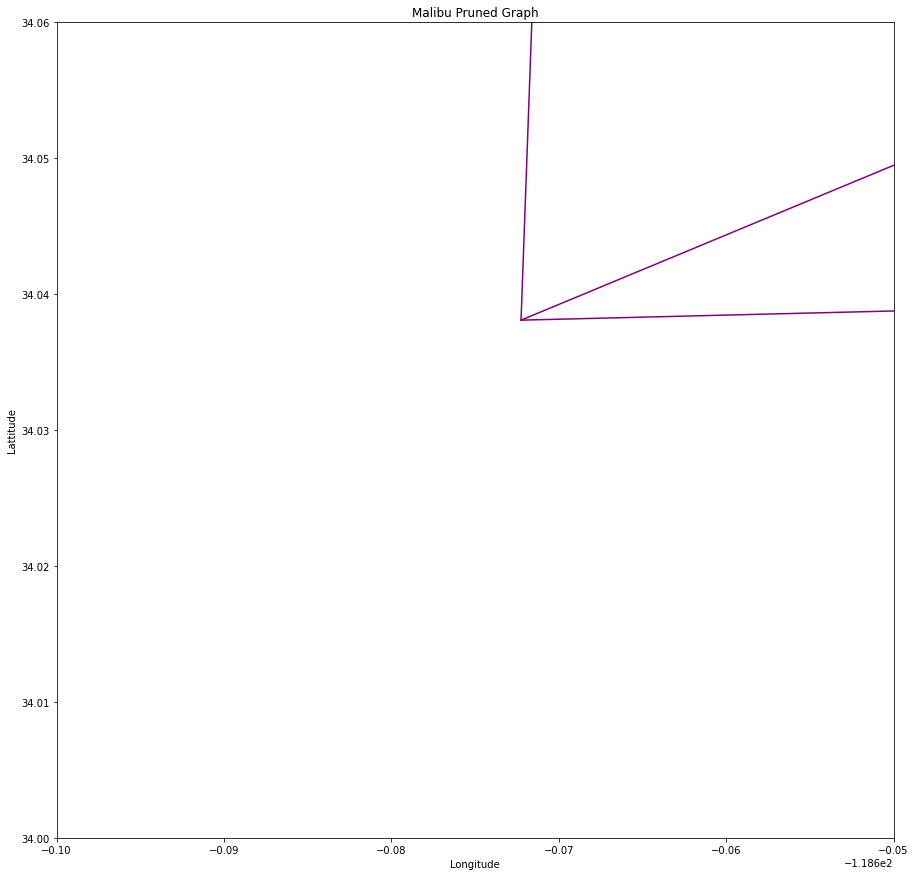

In [31]:
malibu_bound = ((-118.70, -118.65, 34.00, 34.06))
fig, ax = plt.subplots(figsize = (15,15))
for edges in time_prune.keys():
    coords1 = [pin[str(edges[0])][1], pin[str(edges[0])][2]]
    coords2 = [pin[str(edges[1])][1], pin[str(edges[1])][2]]
    ax.plot([coords1[1],coords2[1]], [coords1[0],coords2[0]],color='purple')
ax.set_title('Malibu Pruned Graph')
plt.xlabel('Longitude')
plt.ylabel('Lattitude')
ax.set_xlim(malibu_bound[0],malibu_bound[1])
ax.set_ylim(malibu_bound[2],malibu_bound[3])
plt.show()

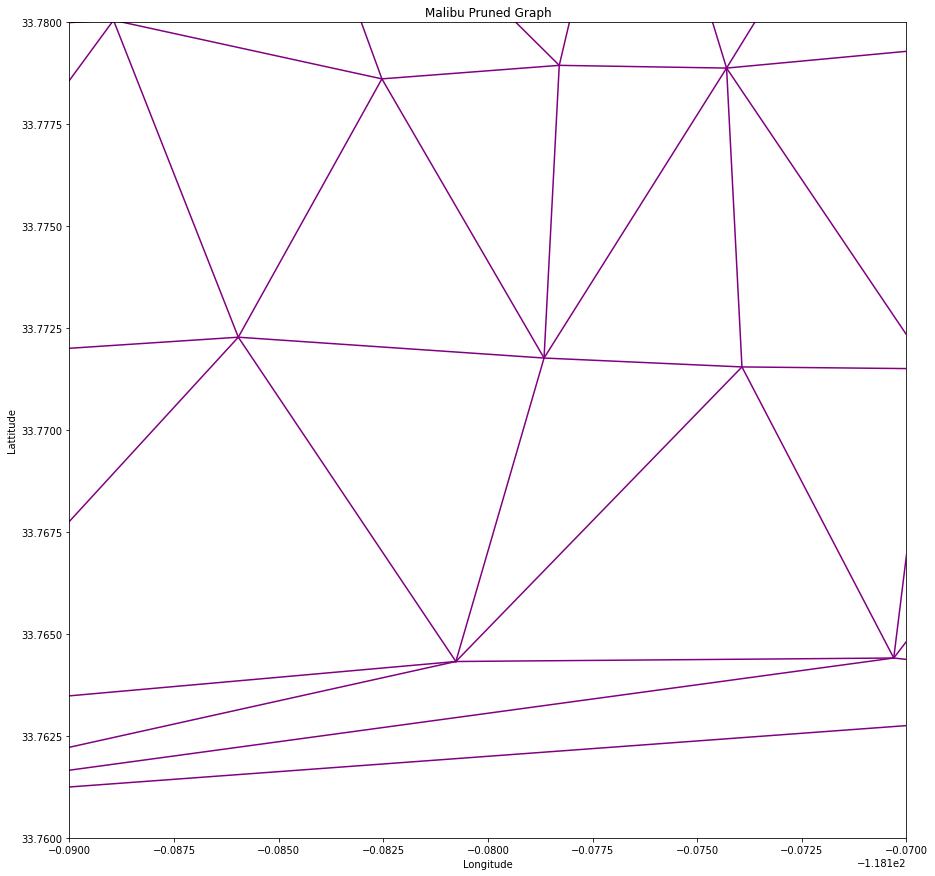

In [32]:
lb_bound = ((-118.19, -118.17, 33.76, 33.78))
fig, ax = plt.subplots(figsize = (15,15))
for edges in time_prune.keys():
    coords1 = [pin[str(edges[0])][1], pin[str(edges[0])][2]]
    coords2 = [pin[str(edges[1])][1], pin[str(edges[1])][2]]
    ax.plot([coords1[1],coords2[1]], [coords1[0],coords2[0]],color='purple')
ax.set_title('Malibu Pruned Graph')
plt.xlabel('Longitude')
plt.ylabel('Lattitude')
ax.set_xlim(lb_bound[0],lb_bound[1])
ax.set_ylim(lb_bound[2],lb_bound[3])
plt.show()

In [77]:
def delaunay_splice(splice):
    splice1 = ((splice[0], splice[1]))
    list(splice1).sort()
    splice2 = ((splice[0], splice[2]))
    list(splice2).sort()
    splice3 = ((splice[1], splice[2]))
    list(splice3).sort()
    return splice1, splice2, splice3

In [78]:
g_del=ig.Graph()
g_del.add_vertices(len(tri.points))
remove_duplicates = set()
for i in range(len(tri.simplices)):
    splice = tri.simplices[i]
    splice1, splice2, splice3 = delaunay_splice(splice)
    if not splice1 in remove_duplicates:
        remove_duplicates.add(splice1)
        g_del.add_edges([splice1])
    if not splice2 in remove_duplicates:
        remove_duplicates.add(splice2)
        g_del.add_edges([splice2])
    if not splice3 in remove_duplicates:
        remove_duplicates.add(splice3)
        g_del.add_edges([splice3])

In [79]:
visual_style = {
    "edge_width": 0.5,
    "vertex_size": 4
}
ig.plot(g_del,**visual_style, target='graphs/q13.png')

Output hidden; open in https://colab.research.google.com to view.

# Calculate Max Flow

## Question 16

In [40]:
def distance(loc1, loc2, type=1):
    if type == 1:
        return np.sqrt((loc1[0] - loc2[0]) ** 2 + (loc1[1] - loc2[1]) ** 2)
    else:
        return np.sqrt((loc1['latitude'] - loc2['latitude']) ** 2 + (loc1['longitude'] - loc2['longitude']) ** 2)

In [139]:
malibu= [-118.78,34.026]
long_beach =  [-118.18,33.77]

min_long_beach=np.inf
min_malibu=np.inf
long_beach_node=0
malibu_node=0
for i in range(1,len(pin2)):
    long_beach_closest=np.sqrt(((pin2[i][0])-long_beach[0])**2+((pin2[i][1])-long_beach[1])**2)
    malibu_closest=np.sqrt((malibu[0]-pin2[i][0])**2+(malibu[1]-pin2[i][1])**2)
    if long_beach_closest<min_long_beach:
        min_long_beach=long_beach_closest
        long_beach_node=i
    if malibu_closest<min_malibu:
        min_malibu=malibu_closest
        malibu_node=i
print(malibu_node)
print(long_beach_node)

1699
660


In [133]:
def get_flow(loc1, loc2, gcc_graph,pin):
    coord1 = [pin[str(loc1)][1], pin[str(loc1)][2]]
    coord2 = [pin[str(loc2)][1], pin[str(loc2)][2]]
    d = 69 * distance(coord1, coord2)
    if (loc1,loc2) in gcc_graph.keys():
        t = gcc_graph[(loc1,loc2)] / 3600
        v = d / t
        flow = (2 * v) / (0.003 + (v / 1800))
        return flow
    else:
        return 0

In [134]:
def add_triangulated_edge(graph, triangle):
    edge12 = tuple(np.sort(triangle[:2]))
    edge13 = tuple(np.sort(triangle[0::2]))
    edge23 = tuple(np.sort(triangle[1:]))   

    flow12 = get_flow(edge12[0],edge12[1],gcc_graph,pin)
    flow13 = get_flow(edge13[0],edge13[1],gcc_graph,pin)
    flow23 = get_flow(edge23[0],edge23[1],gcc_graph,pin)
    if edge12 not in graph.keys() and flow12 > 0:
        graph[edge12] = flow12
    if edge13 not in graph.keys() and flow13 > 0:
        graph[edge13] = flow13
    if edge23 not in graph.keys() and flow23 > 0:
        graph[edge23] = flow23

In [135]:
triangulated_graph = {}

for triangle_idx in tri.simplices:
    triangle = [gcc_ids[triangle_idx[0]], gcc_ids[triangle_idx[1]], gcc_ids[triangle_idx[2]]]
    add_triangulated_edge(triangulated_graph,triangle)

In [136]:
with open('triangulated_graph.txt','w') as f:
    for locations in triangulated_graph:
        string = '{} {} {:.2f}\n'.format(int(locations[0]),int(locations[1]),triangulated_graph[locations])
        f.write(string)

In [137]:
with open('pruned_triangulated_graph.txt','w') as f:
    for loc_pairs in time_prune.keys():
        flow = get_flow(loc_pairs[0],loc_pairs[1], gcc_graph, pin)
        if flow > 0:
            string = '{} {} {:.2f}\n'.format(int(loc_pairs[0]),int(loc_pairs[1]),flow)
            f.write(string)

In [140]:
%load_ext rpy2.ipython

In [142]:
%%R
library('igraph')

R[write to console]: Error in library("igraph") : there is no package called ‘igraph’




Error in library("igraph") : there is no package called ‘igraph’


RInterpreterError: ignored

In [141]:
%%R
tri_graph = read_graph('triangulated_graph.txt',format='ncol',directed=FALSE)
flow = max_flow(tri_graph,'2607','1968',capacity=as.vector(edge_attr(tri_graph)$weight))
flow$value
edge_disjoint_paths(tri_graph,'2607','1968')

R[write to console]: Error in read_graph("triangulated_graph.txt", format = "ncol", directed = FALSE) : 
  could not find function "read_graph"




Error in read_graph("triangulated_graph.txt", format = "ncol", directed = FALSE) : 
  could not find function "read_graph"


RInterpreterError: ignored